 <span style="font-family:'Times New Roman'; font-size:14px">

# **Pizza Sales - Exploratory Data Analysis**


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load all CSVs
orders = pd.read_csv(r"C:\Users\Philipa Opoku\Desktop\TECHCRUSH\WEEK 6\TASK 3\pizza_sales\orders.csv", encoding="latin1")
order_details = pd.read_csv(r"C:\Users\Philipa Opoku\Desktop\TECHCRUSH\WEEK 6\TASK 3\pizza_sales\order_details.csv", encoding="latin1")
pizzas = pd.read_csv(r"C:\Users\Philipa Opoku\Desktop\TECHCRUSH\WEEK 6\TASK 3\pizza_sales\pizzas.csv", encoding="latin1")
pizza_types = pd.read_csv(r"C:\Users\Philipa Opoku\Desktop\TECHCRUSH\WEEK 6\TASK 3\pizza_sales\pizza_types.csv", encoding="latin1")

# Step 2: Merge order details with orders
merged = pd.merge(order_details, orders, on="order_id", how="left")

# Step 3: Merge with pizzas
merged = pd.merge(merged, pizzas, on="pizza_id", how="left")

# Step 4: Merge with pizza types
merged = pd.merge(merged, pizza_types, on="pizza_type_id", how="left")

# Step 5: Preview the final dataframe
merged.head()
print("Final shape:", merged.shape)

# Step 6: Save combined dataset
merged.to_csv("Pizza_Sales_Combined.csv", index=False)

Final shape: (48620, 12)


 <span style="font-family:'Times New Roman'; font-size:11px">
     
### The data has been successfully merged, the next step is exploration.

In [44]:
# Load the combined dataset
df = pd.read_csv("Pizza_Sales_Combined.csv", encoding="latin1")

# Preview
df.head(4)


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."


In [45]:
# Info
df.info()

# Missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

<span style="font-family:'Times New Roman'; font-size:14px">
    
## Recommended Analysis


In [46]:
#  1. Total Revenue / Sales

df['revenue'] = df['price'] * df['quantity']
total_revenue = df['revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

#preview
df.head(4)


Total Revenue: $817,860.05


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75


In [47]:
# 2. Total Quantity Sold

# Sum up the 'quantity' column
total_quantity = df['quantity'].sum()

# Display result
print(f"Total Quantity Sold: {total_quantity:,}")


Total Quantity Sold: 49,574


In [48]:
# 3. Total Orders (using value_counts)

total_orders = df['order_id'].value_counts().shape[0]

print(f"Total Orders: {total_orders:,}")


Total Orders: 21,350


In [49]:
# 4. Number of Pizza Types (using value_counts)

pizza_types_count = df['pizza_type_id'].value_counts().shape[0]

print(f"Number of Pizza Types: {pizza_types_count}")


Number of Pizza Types: 32


In [50]:
# 5. Average Price of Pizzas

average_price = df['price'].mean()

print(f"Average Price of Pizzas: ${average_price:.2f}")


Average Price of Pizzas: $16.49


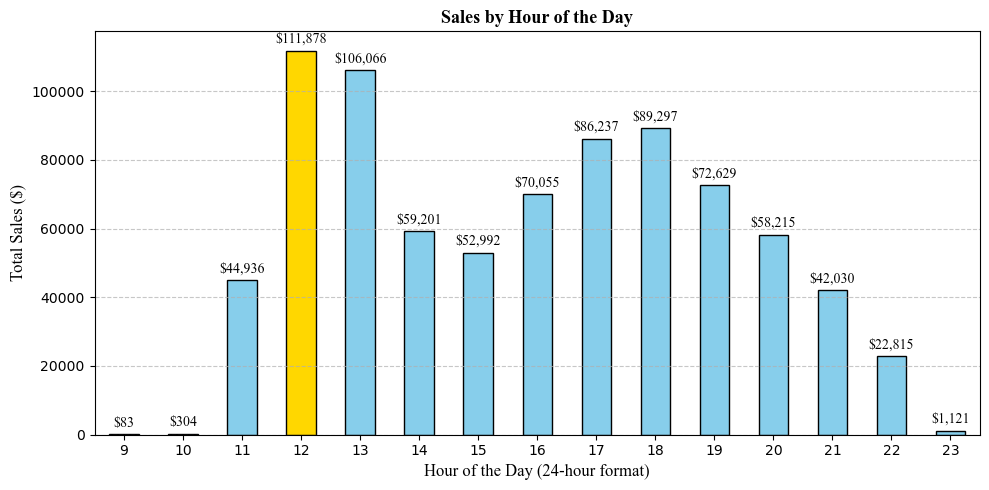


 Peak Hour of Sales: 12:00


In [51]:
# 6. Peak Hours of Sales
# ------------------------
# Ensure 'time' is in datetime format
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Extract the hour
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Group by hour and sum revenue
hourly_sales = df.groupby('hour')['revenue'].sum()

# Find the peak hour
peak_hour = hourly_sales.idxmax()

# --- Visualization ---
plt.figure(figsize=(10,5))

# Highlight peak hour in gold
colors = ["gold" if hour == peak_hour else "skyblue" for hour in hourly_sales.index]

hourly_sales.plot(kind='bar', color=colors, edgecolor='black')

# Titles and labels
plt.title("Sales by Hour of the Day", fontname= "Times New Roman", fontsize=13, weight='bold')
plt.xlabel("Hour of the Day (24-hour format)", fontname= "Times New Roman", fontsize=12)
plt.ylabel("Total Sales ($)", fontname= "Times New Roman", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above bars
offset = hourly_sales.max() * 0.02
for i, value in enumerate(hourly_sales):
    plt.text(i, value + offset, f"${value:,.0f}", ha='center', fontname= "Times New Roman", fontsize=10)

plt.tight_layout()
plt.show()

# Insight
print(f"\n Peak Hour of Sales: {peak_hour}:00")


day_of_week
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: revenue, dtype: float64


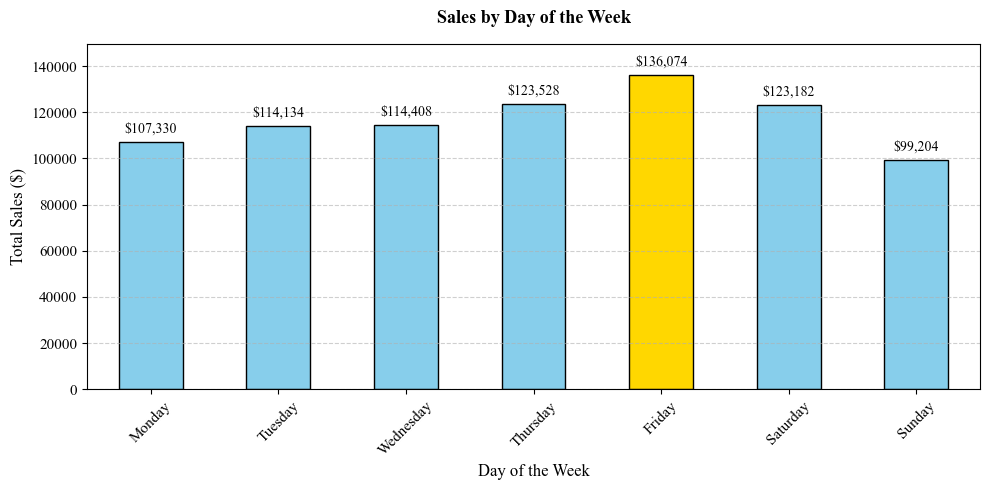


Hence, the day with the highest sales is: Friday


In [52]:
# 7. Sales by Day of the Week: Which day of the week is when sales are made the most? 

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract day name
df['day_of_week'] = df['date'].dt.day_name()

# Group by day_of_week and sum revenue
sales_by_day = df.groupby('day_of_week')['revenue'].sum()

# Reorder days for clarity
sales_by_day = sales_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Print the results
print(sales_by_day)

# Find the top sales day
best_day = sales_by_day.idxmax()

# --- Visualization ---
plt.figure(figsize=(10,5))
plt.ylim(0, max(sales_by_day.values) * 1.1)

# Highlight the best day in gold, others in skyblue
colors = ["gold" if day == best_day else "skyblue" for day in sales_by_day.index]

sales_by_day.plot(kind='bar', color=colors, edgecolor='black')

# Titles & labels
plt.title("Sales by Day of the Week", fontname="Times New Roman", fontsize=13, weight="bold", pad=15)
plt.xlabel("Day of the Week", fontname="Times New Roman", fontsize=12)
plt.ylabel("Total Sales ($)", fontname="Times New Roman", fontsize=12)
plt.xticks(rotation=45, fontname="Times New Roman", fontsize=11)
plt.yticks(fontname="Times New Roman", fontsize=11)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels dynamically
offset = sales_by_day.max() * 0.02  # 2% of max sales
for i, value in enumerate(sales_by_day):
    plt.text(i, value + offset, f"${value:,.0f}", ha='center', va='bottom', 
             fontname="Times New Roman", fontsize=10)

plt.tight_layout()
plt.show()

# Insight
print(f"\nHence, the day with the highest sales is: {best_day}")


Top 5 Bestselling Pizzas:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


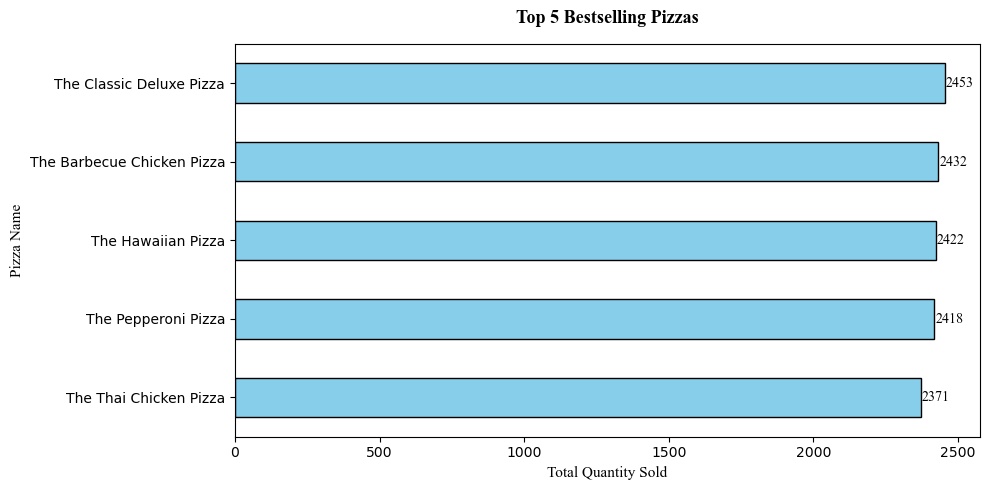


Hence, the bestselling pizza is 'The Classic Deluxe Pizza' with 2,453 sold.


In [53]:
# 8. Top 5 Bestselling Pizzas

# Group by pizza name and sum the quantities sold
top_pizzas = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

# Display the result
print("Top 5 Bestselling Pizzas:")
print(top_pizzas)

# Visualization (horizontal bar)
plt.figure(figsize=(10,5))
top_pizzas.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title("Top 5 Bestselling Pizzas", fontname="Times New Roman", fontsize=13, weight="bold", pad=15)
plt.xlabel("Total Quantity Sold", fontname="Times New Roman", fontsize=11)
plt.ylabel("Pizza Name", fontname="Times New Roman", fontsize=11)

# Invert y-axis so the biggest bar is at the top
plt.gca().invert_yaxis()

# Add value labels at the end of bars
for i, value in enumerate(top_pizzas):
    plt.text(value + 5, i, str(value), va='center', fontname="Times New Roman", fontsize=10)

plt.tight_layout()
plt.show()

# Insight
best_pizza = top_pizzas.idxmax()
best_qty = top_pizzas.max()
print(f"\nHence, the bestselling pizza is '{best_pizza}' with {best_qty:,} sold.")

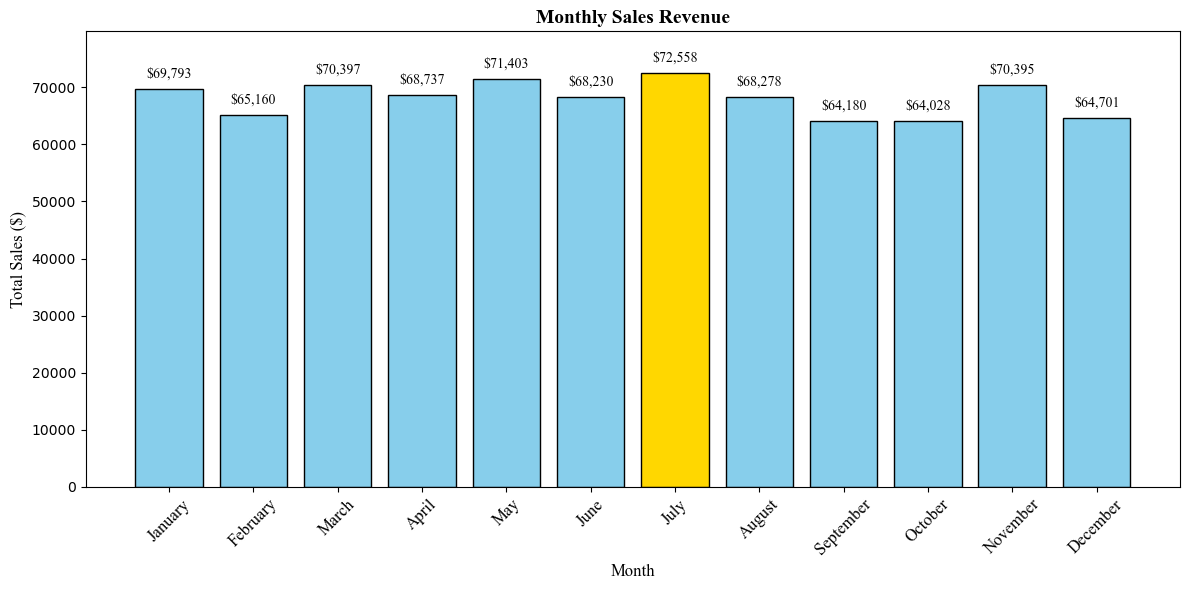

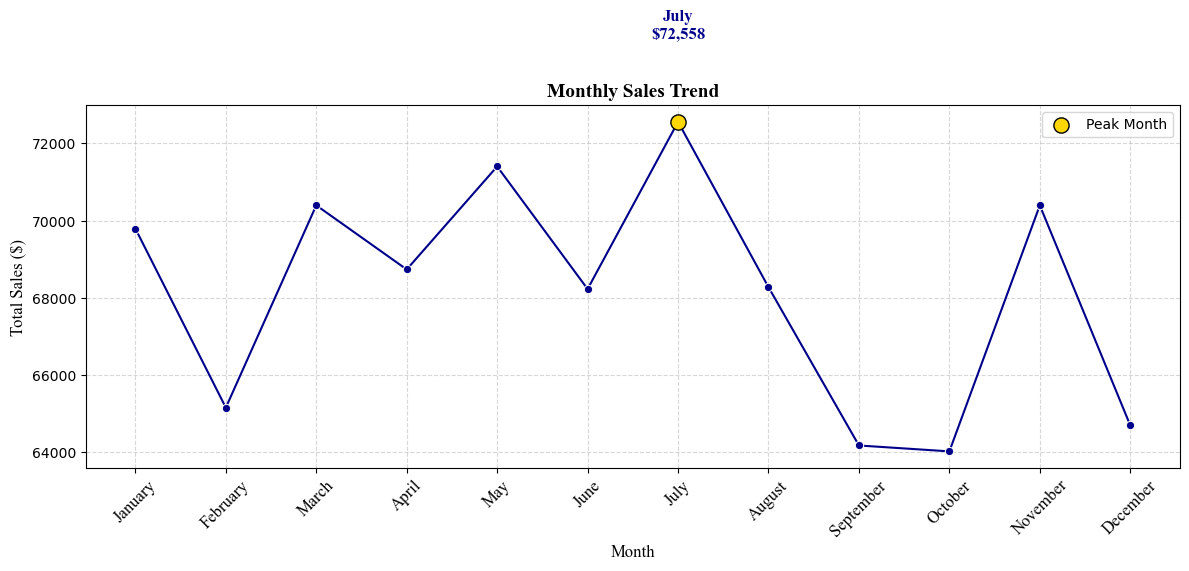

Hence, the month with the highest sales is July with $72,557.90 in revenue.

Noticeable Trend:
Sales peak in July, show another rise in November, and dip in February and October.
This suggests demand is strongest mid-year, with some variation toward the end of the year.



In [54]:
# Find the sales made in each month. Any trend noticeable?

# --- Step 1: Convert 'date' column to datetime ---
df['date'] = pd.to_datetime(df['date'])

# --- Step 2: Extract month name ---
df['month'] = df['date'].dt.strftime('%B')

# --- Step 3: Group by month and sum revenue ---
sales_by_month = df.groupby('month')['revenue'].sum()

# --- Step 4: Reorder months in calendar order ---
months_order = ["January","February","March","April","May","June","July",
                "August","September","October","November","December"]
sales_by_month = sales_by_month.reindex(months_order)

# --- Bar Chart: Monthly Revenue ---
plt.figure(figsize=(12,6))
plt.ylim(0, sales_by_month.max() * 1.1)

# Highlight best month in gold
best_month = sales_by_month.idxmax()
colors = ["gold" if month == best_month else "skyblue" for month in sales_by_month.index]

plt.bar(sales_by_month.index, sales_by_month.values, 
        color=colors, edgecolor="black")

plt.title("Monthly Sales Revenue", fontname="Times New Roman", fontsize=14, weight="bold")
plt.xlabel("Month", fontname="Times New Roman", fontsize=12)
plt.ylabel("Total Sales ($)", fontname="Times New Roman", fontsize=12)
plt.xticks(rotation=45, fontname="Times New Roman", fontsize=12)

# Add value labels
for i, value in enumerate(sales_by_month.values):
    if not pd.isna(value):
        plt.text(i, value + (0.02 * sales_by_month.max()), 
                 f"${value:,.0f}", ha='center', va='bottom', 
                 fontname="Times New Roman", fontsize=10)

plt.tight_layout()
plt.show()

# --- Line Chart: Monthly Sales Trend ---
plt.figure(figsize=(12,6))

sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, 
             marker="o", linewidth=1.5, color="darkblue")

plt.title("Monthly Sales Trend", fontname="Times New Roman", fontsize=14, weight="bold")
plt.xlabel("Month", fontname="Times New Roman", fontsize=12)
plt.ylabel("Total Sales ($)", fontname="Times New Roman", fontsize=12)
plt.xticks(rotation=45, fontname="Times New Roman", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Highlight best month
best_sales = sales_by_month.max()
best_index = list(sales_by_month.index).index(best_month)

plt.scatter(best_index, best_sales, s=120, color="gold", edgecolor="black", zorder=5, label="Peak Month")
plt.text(best_index, best_sales + (0.03 * best_sales), 
         f"{best_month}\n${best_sales:,.0f}", 
         ha='center', color="darkblue", fontsize=12, weight="bold", fontname="Times New Roman")

plt.legend()
plt.tight_layout()
plt.show()

# --- Insights ---
print(f"""Hence, the month with the highest sales is {best_month} with ${best_sales:,.2f} in revenue.

Noticeable Trend:
Sales peak in July, show another rise in November, and dip in February and October.
This suggests demand is strongest mid-year, with some variation toward the end of the year.
""")


Underperforming Pizza types on the Menu - (Bottom 5) :
name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


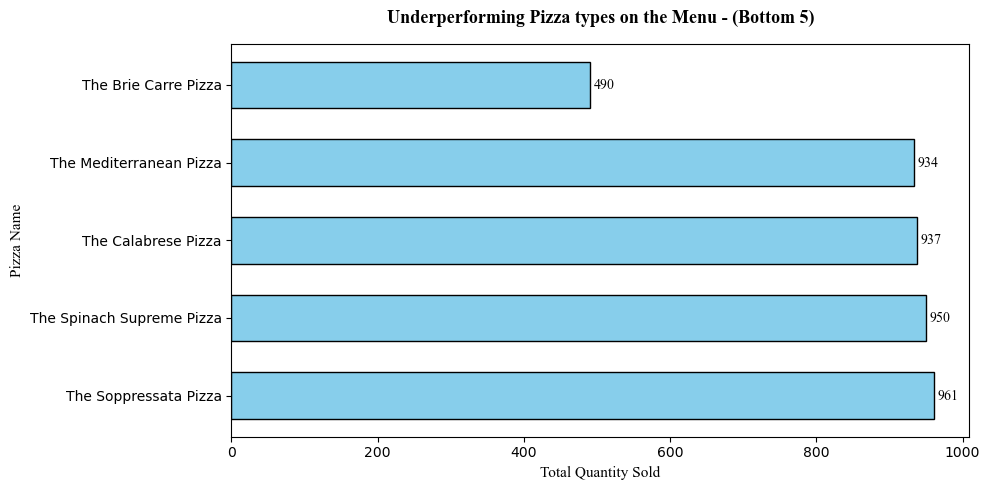

In [55]:
# 10. Underperforming Pizza Types on the Menu

# Group by pizza type (name) and sum quantities
pizza_performance = df.groupby('name')['quantity'].sum().sort_values()

# Show bottom 5 pizzas
worst_pizzas = pizza_performance.head(5)

print("Underperforming Pizza types on the Menu - (Bottom 5) :")
print(worst_pizzas)

# --- Visualization
plt.figure(figsize=(10,5))
plt.barh(worst_pizzas.index, worst_pizzas.values, color='skyblue', edgecolor='black', height=0.6)

plt.title("Underperforming Pizza types on the Menu - (Bottom 5)", fontname="Times New Roman", fontsize=13, weight="bold", pad=15)
plt.xlabel("Total Quantity Sold", fontname="Times New Roman", fontsize=11)
plt.ylabel("Pizza Name", fontname="Times New Roman", fontsize=11)

# Invert y-axis so the smallest bar is at the top
plt.gca().invert_yaxis()

# Add value labels at the end of bars
for i, value in enumerate(worst_pizzas.values):
    plt.text(value + 5, i, str(value), va='center', fontname="Times New Roman", fontsize=10)

plt.tight_layout()
plt.show()
